<a href="https://colab.research.google.com/github/approjecthub/Machine-learning/blob/master/customer_segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Attribute Information:

1)	FRESH: annual spending (m.u.) on fresh products (Continuous);<br> 
2)	MILK: annual spending (m.u.) on milk products (Continuous); <br>
3)	GROCERY: annual spending (m.u.)on grocery products (Continuous);<br> 
4)	FROZEN: annual spending (m.u.)on frozen products (Continuous) <br>
5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)<br> 
6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); <br>
7)	CHANNEL: customers’ Channel - Horeca (Hotel/Restaurant/Café) or Retail channel (Nominal) <br>
8)	REGION: customers’ Region – Lisnon, Oporto or Other (Nominal)

In [0]:
import numpy as np
import pandas as pd

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/approjecthub/Machine-learning/master/Datasets/Wholesale%20customers%20data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<b>Channel</b> and <b>Region</b> fields are already label encoded

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7ebea0390>]],
      dtype=object)

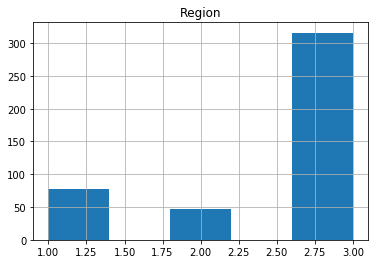

In [0]:
data.hist(column=['Region'], bins=5)

REGION	Frequency <br>
Lisbon	77<br> 
Oporto	47 <br>
Other Region	316 <br>
Total	440 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7e95eaf60>]],
      dtype=object)

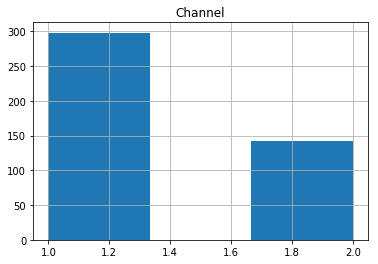

In [0]:
data.hist(column=['Channel'], bins=3)

CHANNEL	Frequency <br>
Horeca	298 <br>
Retail	142 <br>
Total	440 

In [0]:
data2 = data.copy()

In [0]:
#Grouping based on region 

data_oporto = data2[data2.Region == 2.0]
data_lisbon = data2[data2.Region == 1.0]
data_others = data2[data2.Region == 3.0]

print('length of each grpup: ',data_lisbon.shape[0],' ', data_oporto.shape[0], ' ', data_others.shape[0])


length of each grpup:  77   47   316


In [0]:
data_oporto.drop(columns=['Region'], inplace=True)
data_lisbon.drop(columns=['Region'], inplace=True)
data_others.drop(columns=['Region'], inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7e90ef4a8>]],
      dtype=object)

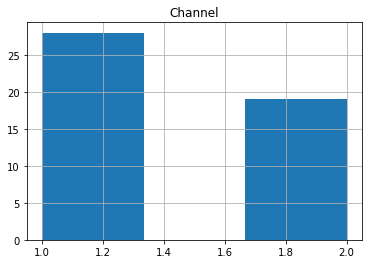

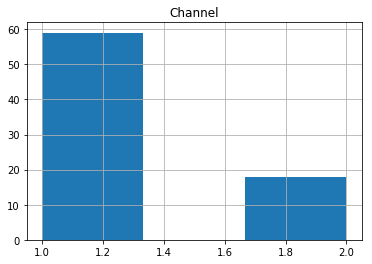

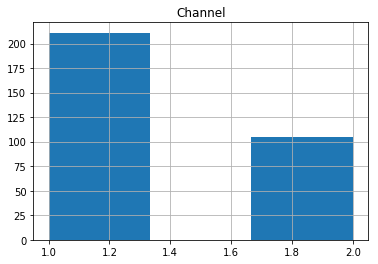

In [0]:
data_oporto.hist(column=['Channel'], bins=3)
data_lisbon.hist(column=['Channel'], bins=3)
data_others.hist(column=['Channel'], bins=3)

from the above histogram plots we can conclude that channel-1 is more utilised than chanel-2 in all regions by the customers.

In [0]:
data_lisbon.columns

Index(['Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicassen'],
      dtype='object')

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data2=scaler.fit_transform(data2)

data2[0:5]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689]])

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X = pca.fit_transform(data2)

pca.explained_variance_ratio_

array([0.38750123, 0.22374588])

<b>From the value of explained variance we can conclude the optimum value of number of columns that is must to explain the data

In [0]:
X.shape

(440, 2)

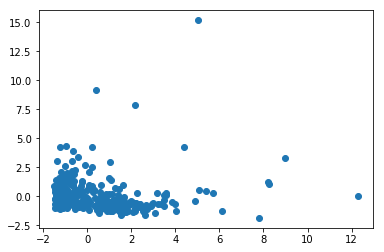

In [0]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1])

In [0]:
# Now we will apply kmeans clustering technique to get hidden groups of customer

#Here I am assuming that there are 3 groups of customer, no. of clusters will be 3

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

y_kmeans = kmeans.predict(X)

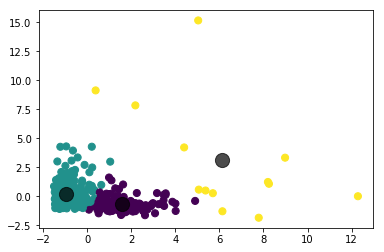

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7);

<b> From this plot it can be concluded that there are mainly 2 classes of customers and yellow circles are representing the outliers